<a href="https://colab.research.google.com/github/MalihehMaleki/Machinelearning2023/blob/main/Miniproject2/miniproject2_q1_MalihehMaleki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1iPrPZZKjKAwEumQ3s8kGCvIMURt1TaF-
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 38.0MB/s]
Accuracy on train : 0.815625
Accuracy on test : 0.8


<ipython-input-44-a24325ca9694>:42: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test = y_test.astype(np.int)


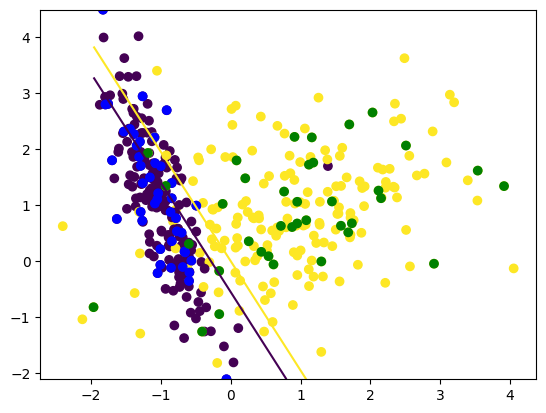

Dimensions of the training features: (320, 2)
Dimensions of the training target: (320,)
Dimensions of the testing features: (80, 2)
Dimensions of the testing target: (80,)
Iter=0, Loss=0.9785
Iter=10, Loss=1.045
Iter=20, Loss=1.118
Iter=30, Loss=1.196
Iter=40, Loss=1.279
Iter=50, Loss=1.366
Iter=60, Loss=1.456
Iter=70, Loss=1.549
Iter=80, Loss=1.644
Iter=90, Loss=1.742
Iter=100, Loss=1.841
Iter=110, Loss=1.942
Iter=120, Loss=2.044
Iter=130, Loss=2.148
Iter=140, Loss=2.252
Iter=150, Loss=2.357
Iter=160, Loss=2.462
Iter=170, Loss=2.568
Iter=180, Loss=2.675
Iter=190, Loss=2.782
Iter=200, Loss=2.889
Iter=210, Loss=2.997
Iter=220, Loss=3.105
Iter=230, Loss=3.213
Iter=240, Loss=3.321
Iter=250, Loss=3.429
Iter=260, Loss=3.538
Iter=270, Loss=3.646
Iter=280, Loss=3.755
Iter=290, Loss=3.864
Iter=300, Loss=3.973
Iter=310, Loss=4.082
Iter=320, Loss=4.191
Iter=330, Loss=4.3
Iter=340, Loss=4.409
Iter=350, Loss=4.518
Iter=360, Loss=4.627
Iter=370, Loss=4.736
Iter=380, Loss=4.845
Iter=390, Loss=4.954


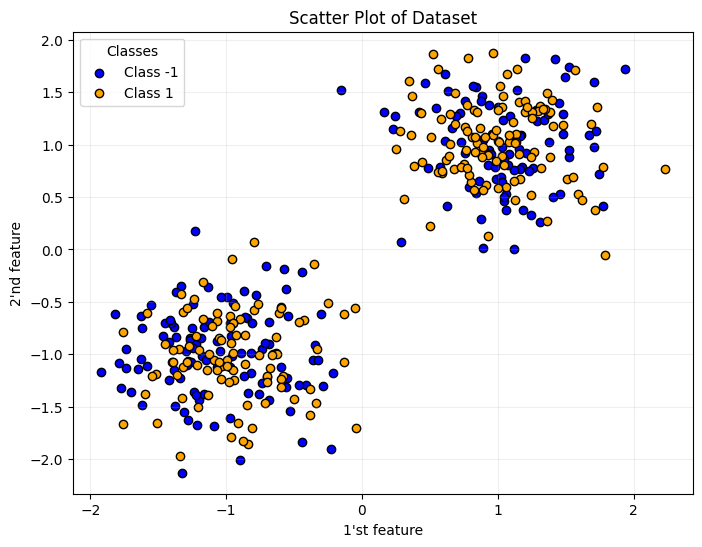

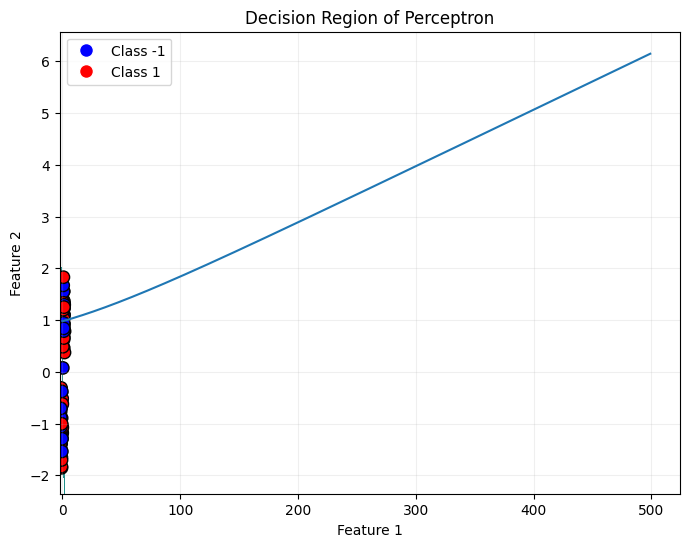

In [ ]:
# Machine Learning 2023 / miniproject 2
# question 1 / part 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification , make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import __main__
!pip install --upgrade --no-cache-dir gdown
!gdown 1iPrPZZKjKAwEumQ3s8kGCvIMURt1TaF-

file = pd.read_csv (r'/content/Perceptron.csv')
df = pd.read_csv("/content/Perceptron.csv")
df
x = file.iloc[:, :-1].values # x is features
y = file.iloc[:, -1].values  # y is target

y = np.where(y == -1, 0, 1)
y

X, y = make_classification(n_samples=400, n_features=2, n_classes=2,
n_clusters_per_class=1, n_redundant=0, random_state=13)
plt.scatter(X[:, 0], X[:, 1] ,c=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape , X_test.shape, y_train.shape , y_test.shape

model = Perceptron()
model.fit(X_train, y_train)


#part 2

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Accuracy on train : {train_accuracy}")
print(f"Accuracy on test : {test_accuracy}")

y_test = y_test.astype(np.int)

x1_min, x2_min = X_test.min(0)
x1_max, x2_max = X_test.max(0)
n=400
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)
xm = np.stack((x1m.flatten(), x2m.flatten()),axis=1)
ym = model.decision_function(xm)
colors = np.array(['blue', 'green'])
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors[y_test])
plt.contour(x1m, x2m, ym.reshape(x1m.shape), levels=[0,1])
plt.show()

# part 3

def relu(x):
    return np.maximum(0, x)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def tanh(x):
    return np.tanh(x)
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc
class Neuron:

    def __init__(self, in_features, threshold, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.threshold = threshold
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad = None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.threshold
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def decision_function(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.threshold
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)

    def gradient_descent(self):
        self.w -= self.eta * self.threshold

    def __repr__(self):
        af_name = self.af.__name__ if self.af is not None else None
        loss_fn_name = self.loss_fn.__name__ if self.loss_fn is not None else None
        return f'Neuron({self.in_features}, {self.threshold}, {af_name}, {loss_fn_name}, {self.n_iter}, {self.eta}, {self.verbose})'

    def parameters(self):
        return {'w': self.w, 'threshold': self.threshold}

plt.figure(figsize=(8, 6))
scatter_class_0 = plt.scatter(x[y == 0, 0], x[y == 0, 1], color='blue', label='Class -1', edgecolors='k', marker='o')
scatter_class_1 = plt.scatter(x[y == 1, 0], x[y == 1, 1], color='orange', label='Class 1', edgecolors='k', marker='o')
plt.xlabel("1'st feature")
plt.ylabel("2'nd feature")
plt.title('Scatter Plot of Dataset')
plt.legend(handles=[scatter_class_0, scatter_class_1], title='Classes',loc="upper left")
plt.grid(alpha=0.2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=93, stratify=y, shuffle=True)

# Display the dimensions of the training and testing sets
print(f'Dimensions of the training features: {x_train.shape}')
print(f'Dimensions of the training target: {y_train.shape}')
print(f'Dimensions of the testing features: {x_test.shape}')
print(f'Dimensions of the testing target: {y_test.shape}')

neuron = Neuron(in_features=2, threshold=0.1, af=sigmoid, loss_fn=bce, n_iter=500, eta=0.1, verbose=True)
neuron.fit(x_train, y_train[:, None])
print(f'Neuron specification: {neuron}')
print(f'Neuron parameters: {neuron.parameters()}')

plt.figure(figsize=(8, 6))
plt.plot(neuron.loss_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function')
plt.grid(alpha=0.5)

y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)
x1_min, x2_min = x_test.min(0) - 0.5
x1_max, x2_max = x_test.max(0) + 0.5

n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)

xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = neuron.decision_function(xm)

plt.contourf(x1m, x2m, ym.reshape(x1m.shape), levels=[-0.5, 0.5])

colors = np.array(['blue', 'red'])
plt.scatter(x_test[:, 0], x_test[:, 1], c=colors[y_test], edgecolors='k', marker='o', s=80, linewidth=1, label='Test Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region of Perceptron')
plt.legend()
plt.grid(alpha=0.2)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class -1'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')]
plt.legend(handles=legend_elements, loc='upper left')


plt.show()
